There are Four steps in K-means clustering:
1. Initializsation: assign K initial centroids.
2. Assignment: K clusters are created by associating each observation with the nearest centroid.
3. Update: The centroid of the clusters becomes the new centoid.
3. Stop or not: if not convergence, come back to step-2.

Please use K-means algorithm and Euclidean distance to cluster the 9 customers into 3 clusters. The initial centroids MUST be A, D, and H. 
Please only write codes in the fenced parts by #.

In [0]:
# import necessary libraries
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
## Define functions
# Assignment Stage
def assignment(df, centroids):
  for i in centroids.keys():
    #  Euclidean distance: sqrt((x1 - x2)^2 - (y1 - y2)^2)
    df[f'distance_from_{i}'] = (
        np.sqrt(
            (df['income'] - centroids[i][0])**2
          + (df['age'] - centroids[i][1])**2 
        )
    )

  centroid_distance_cols = [f'distance_from_{i}' for i in centroids.keys()]
  df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
  df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
  df['color'] = df['closest'].map(lambda x: col_map[x])
  return df

# Update Stage
def update(centroids):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['income'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['age'])
    return centroids

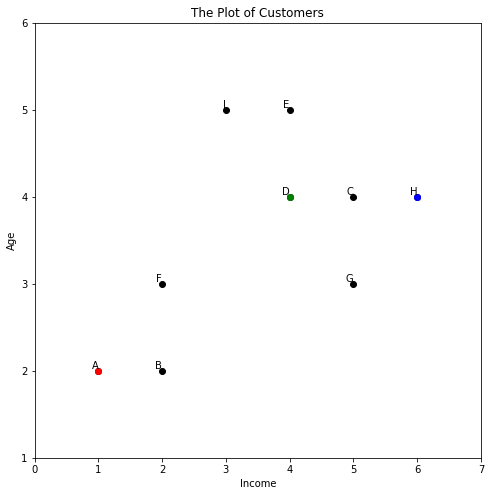

In [11]:
# 9 customers
customers = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
df = pd.DataFrame({
    'income': [1, 2, 5, 4, 4, 2, 5, 6, 3],
    'age':    [2, 2, 4, 4, 5, 3, 3, 4, 5]   
})

k = 3
# Step-1: Assign 3 initail centroids.
#########################################################################################################
####################################### Please write codes here ! #######################################
#########################################################################################################
centroids = {
    # Please specify three centroids below

    1: [1, 2], 2: [4, 4], 3: [6, 4],

}
#########################################################################################################
#########################################################################################################

# visualize
fig = plt.figure(figsize=(8, 8))
plt.scatter(df['income'], df['age'], color='k')
col_map = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
  plt.scatter(*centroids[i], color=col_map[i])
for i, cus_name in enumerate(customers):
  plt.annotate(cus_name,
               xy=(df['income'][i], df['age'][i]), ha='right', va='bottom'
  )
plt.xlim(0, 7)
plt.ylim(1, 6)
plt.title('The Plot of Customers')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

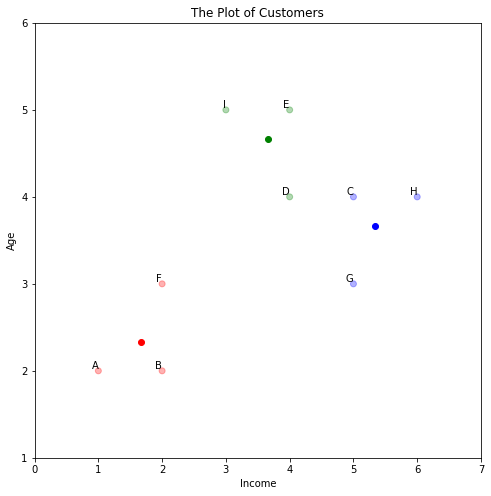

In [19]:
# Step-2: Continue until all assigned categories don't change any more
#########################################################################################################
####################################### Please write codes here ! #######################################
#########################################################################################################
df = assignment(df, centroids)
while True:
    closest_centroids = df['closest'].copy(deep=True)
    # Please determine the order of update() and assignment() below, Hint: 2 lines of codes
    
    df = assignment(df, centroids)

    centroids = update(centroids)
    
    if closest_centroids.equals(df['closest']):
        break
#########################################################################################################
#########################################################################################################

# visualize
fig = plt.figure(figsize=(8, 8))
plt.scatter(df['income'], df['age'], color=df['color'], alpha=0.3)
for i in centroids.keys():
  plt.scatter(*centroids[i], color=col_map[i])
for i, cus_name in enumerate(customers):
  plt.annotate(cus_name,
               xy=(df['income'][i], df['age'][i]), ha='right', va='bottom'
  )
plt.xlim(0, 7)
plt.ylim(1, 6)
plt.title('The Plot of Customers')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()